C:\Users\Youssef Zarrouk\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


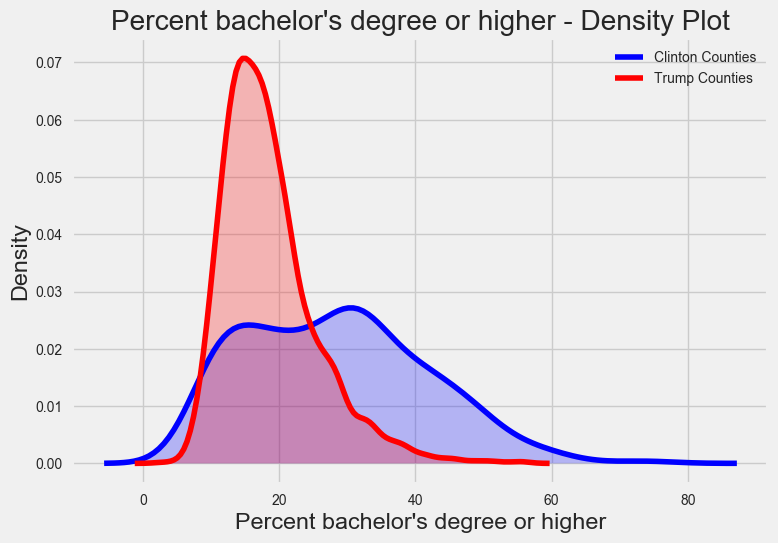

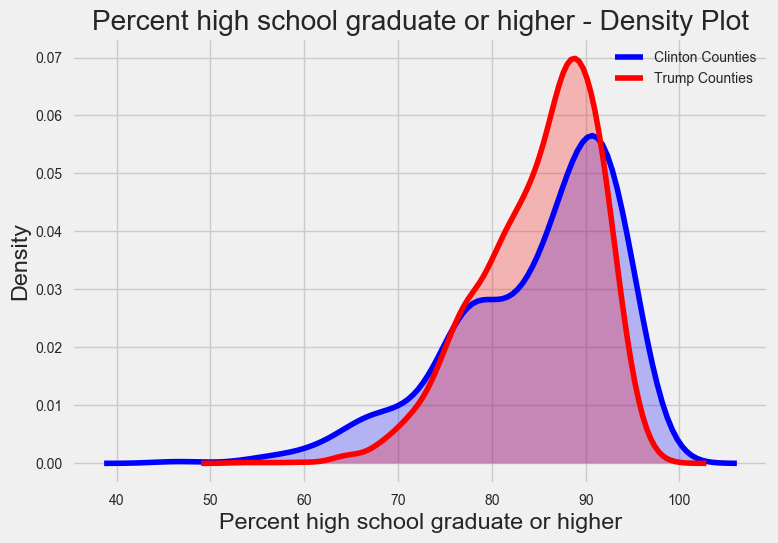

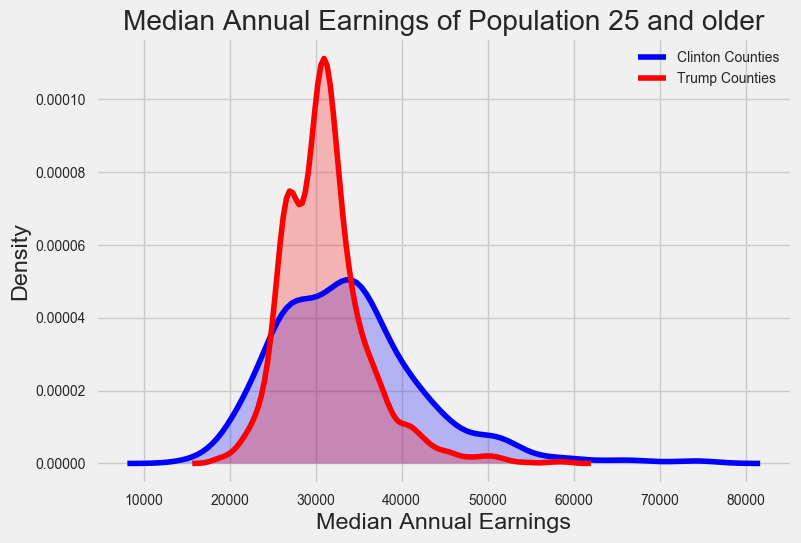

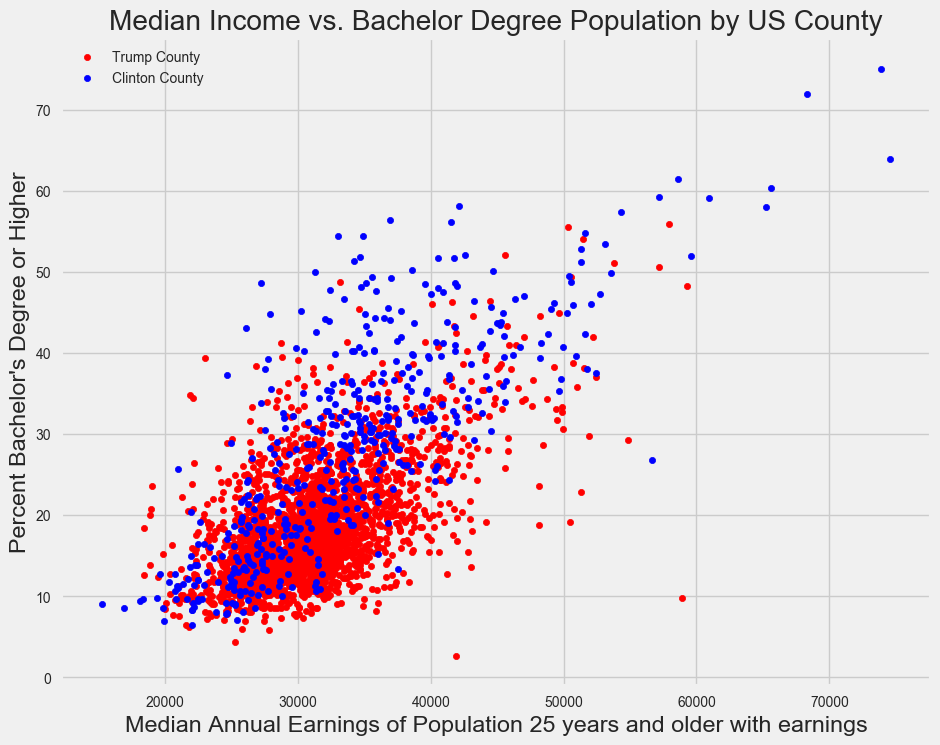

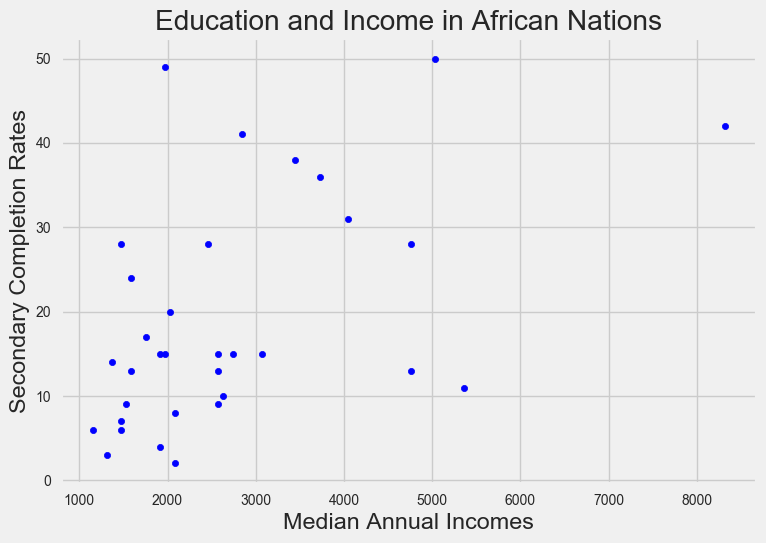

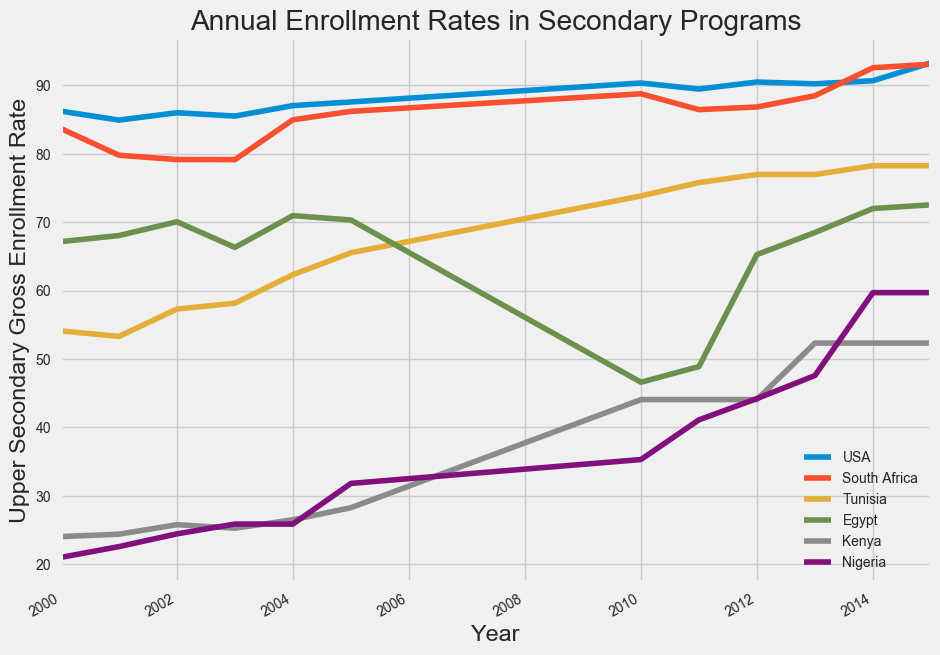

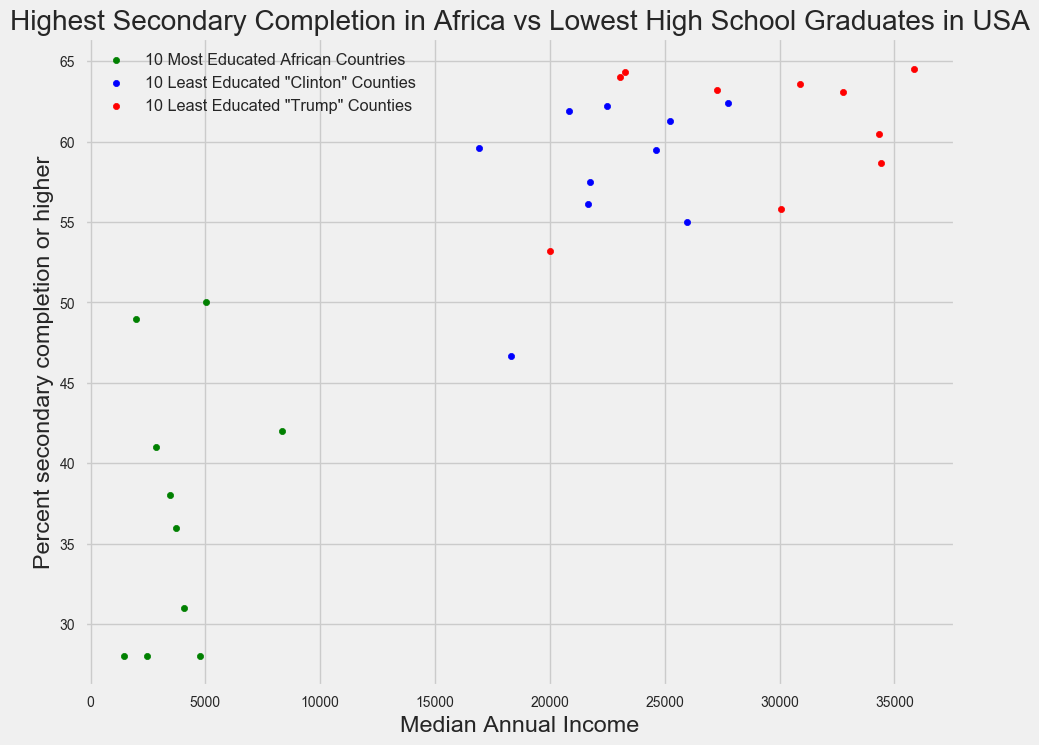

In [1]:
#Getting Python ready
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.axes import Axes
import seaborn as sns

import quandl


#Importing list of counties w/ presidential affiliation (dataset from kaggle)
ogcounties = pd.read_csv('pres16results.csv')
ogcounties.reset_index(inplace = True)



#Functions to clean up counties w/ presidential affiliation
def removenans(df):
    for i in df['index']:
        if type (df['county'][i]) == float:
            df.drop([i], inplace = True)
    return df  
                    
def removeduplicates(df):  
    for i in df['index']:
        if df['cand'][i] != 'Donald Trump':
            df.drop([i], inplace = True)
    return df    

cleancounties = removenans(ogcounties)
counties = removeduplicates(cleancounties)



#Funtions to clean up data and create dataframes that consist of exclusively of Trump counties or Clinton counties
def trumpwins(df):
    for i in df['index']:
        if df['lead'][i] != 'Donald Trump':
            df.drop([i], inplace = True)
    return df

def clintonwins(df):
    for i in df['index']:
        if df['lead'][i] != 'Hillary Clinton':
            df.drop([i], inplace = True)
    return df

counties1 = counties.copy()
trumpcounties = trumpwins(counties1)
clintoncounties = clintonwins(counties)



#Importing education data by county as well as list of U.S. States from Wikipedia to standardize naming (dataset from U.S. Census bureau)
educounties = pd.read_csv('ACS_14_5YR_S1501_with_ann.csv', encoding = "ISO-8859-1", header = 1)
usstates = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states', header = 0)[0]
usstates.reset_index(inplace = True)



#Prepping education dataframe
alledu = educounties.reset_index()




#Function to standardize naming
def longnames(pd):
    comma = ', '
    for i in pd['index']:
        for j in usstates['index']:
            if pd['st'][i] == usstates['Abbreviation'][j]:
                pd['county'][i] = pd['county'][i] + comma + usstates['State Name'][j]
    return pd

finalclinton = longnames(clintoncounties)
finaltrump = longnames(trumpcounties)



#Creating dataframes from census data that consist of exclusively Trump or exclusive Clinton counties by comparing to their respective county list we already made
trumpedu = alledu.copy()
for i in trumpedu['index']:
    breaker = 0
    for j in finaltrump['county']:
        if trumpedu['Geography'][i] == j:
            breaker =1 
    if breaker < 1:
        trumpedu.drop([i],inplace = True)
        
clintonedu = alledu.copy()
for i in clintonedu['index']:
    breaker = 0
    for j in finalclinton['county']:
        if clintonedu['Geography'][i] == j:
            breaker =1 
    if breaker < 1:
        clintonedu.drop([i],inplace = True)
        
        
#Plotting bachelor degree comparisons
plotting = "Total; Estimate; Percent bachelor's degree or higher"
style.use('fivethirtyeight')
fig=plt.figure(dpi=100)

sns.kdeplot(clintonedu[plotting], color = 'b', label = 'Clinton Counties', shade=True)
sns.kdeplot(trumpedu[plotting], color = 'r', label = 'Trump Counties', shade=True)

plt.title(plotting[17:] + ' - Density Plot')
plt.xlabel("Percent bachelor's degree or higher")
plt.ylabel('Density')
plt.show()



#Plotting high school degree comparisons
plotting = "Total; Estimate; Percent high school graduate or higher"
style.use('fivethirtyeight')
fig=plt.figure(dpi=100)

sns.kdeplot(clintonedu[plotting], color = 'b', label = 'Clinton Counties', shade=True)
sns.kdeplot(trumpedu[plotting], color = 'r', label = 'Trump Counties', shade=True)

plt.title(plotting[17:] + ' - Density Plot')
plt.xlabel("Percent high school graduate or higher")
plt.ylabel('Density')
plt.show()



#Plotting median income comparisons
plotting = "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"
style.use('fivethirtyeight')
fig=plt.figure(dpi=100)

sns.kdeplot(clintonedu[plotting], color = 'b', label = 'Clinton Counties', shade=True)
sns.kdeplot(trumpedu[plotting], color = 'r', label = 'Trump Counties', shade=True)

plt.title('Median Annual Earnings of Population 25 and older')
plt.xlabel("Median Annual Earnings")
plt.ylabel('Density')
plt.show()



#Plotting all county bachelor degree and income data by presidential candidate
somex = "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"
somey = "Total; Estimate; Percent bachelor's degree or higher"

fig = plt.figure(figsize=(10, 8),dpi=100)
ax1 = plt.subplot2grid((1,1),(0,0))

trumpedu.plot.scatter(ax = ax1, x = somex, y = somey, label= 'Trump County', color = 'r')
clintonedu.plot.scatter(ax = ax1, x = somex, y = somey, label = 'Clinton County', color = 'b')

plt.xlabel('Median Annual Earnings of Population 25 years and older with earnings')
plt.ylabel("Percent Bachelor's Degree or Higher")
plt.title("Median Income vs. Bachelor Degree Population by US County")
plt.show()



#Importing and prepping dataframes for Africa analysis
allafrica = pd.read_html("http://www.worldometers.info/geography/how-many-countries-in-africa/")
allafrica = allafrica[0]
allafrica.reset_index(inplace = True)

alleducation = pd.read_csv("Completion-Rate.csv", encoding = "ISO-8859-1")
incomes = pd.read_csv("Median income.csv", encoding = "ISO-8859-1")
alleducation.reset_index(inplace = True)
incomes.reset_index(inplace = True)



#Filtering education and income datasets using list of African countries
africaedu=alleducation.copy()
for i in alleducation['index']:
    resetter1 = 0
    for j in allafrica['index']:
        if allafrica['Country'][j] == alleducation['Countries'][i]:
            resetter1 = 1
    if resetter1 != 1:
        africaedu.drop([i], inplace = True)

africaincome = incomes.copy()
for i in incomes['index']:
    resetter2 = 0
    for j in allafrica['index']:
        if incomes['Country'][i] == allafrica['Country'][j]:
            resetter2 = 1
    if resetter2 != 1:
        africaincome.drop([i], inplace = True)
        

        
#Sorting income and secondary completion data in descending order
sortedafrica = africaedu.sort_values(' Total ',ascending = False)
sortedincome = africaincome.sort_values('Median annual income', ascending = False)



#Combining education and income dataframes
indexedu = sortedafrica.copy()
indexincome = sortedincome.copy()
indexedu.set_index(['ISO3 Code'], inplace = True)
indexincome.set_index(['WB Code'], inplace = True)
indexincome['Completion Rate'] = indexedu[' Total ']
mydf = indexincome.sort_values('Completion Rate', ascending = False)



#Plotting all income and education data in scatterplot 
fig = plt.figure(dpi=100)
ax2 = plt.subplot2grid((1,1),(0,0))

my_x = 'Median annual income'
my_y = 'Completion Rate'

mydf.plot.scatter(ax = ax2, x = my_x, y = my_y, color = 'b')
plt.title('Education and Income in African Nations')
plt.ylabel('Secondary Completion Rates')
plt.xlabel('Median Annual Incomes')
plt.show()



#Setting up my function to pull World Bank data from Quandl using API
my_key = open('quandlapikey.txt','r').read() #Make sure you get your own API key ;)
def wedu(code):
    df = quandl.get(code, authtoken=my_key)
    return df



#Setting up dataframe from Quandl of the top 5 African countries
fivedf =pd.DataFrame()
for i in sortedafrica['index'][:5]:
    somedf = wedu("WEDU/" + (sortedafrica['ISO3 Code'][i]) + "_SE_SEC_ENRR_UP")
    somedf.rename(columns = {'Value':sortedafrica['Countries'][i]}, inplace = True)
    if fivedf.empty:
        fivedf=somedf.copy()
    else:
        fivedf = fivedf.join(somedf)

        

#Pulling Quandl data for the US of A
usadf1 = quandl.get('WEDU/USA_SE_SEC_ENRR_UP', authtoken="po1CSaR9gZ3xXyynxNAL")
usadf1.rename(columns = {'Value':'USA'}, inplace = True)



#Combining dataframes to create a single one, cleaning up empty data
sixdf = fivedf.join(usadf1)
sevendf = sixdf.fillna(method = 'ffill')
sevendf.reset_index(inplace = True)
sevendf.drop([0,1], inplace = True)
sevendf.set_index('Date', inplace = True)
newcolumns = ['USA','South Africa','Tunisia','Egypt','Kenya','Nigeria']



#Plotting Quandl data
style.use('fivethirtyeight')
fig=plt.figure(dpi=100)
ax3 = plt.subplot2grid((1,1),(0,0))
sevendf[newcolumns].plot(ax = ax3, figsize=(10,8))

plt.xlabel('Year')
plt.ylabel('Upper Secondary Gross Enrollment Rate')
plt.title('Annual Enrollment Rates in Secondary Programs')
plt.show()



#Selecting lowest high school grad counties from the Trump and Clinton dataframes
hsgrads = "Total; Estimate; Percent high school graduate or higher"
sortedclinton=clintonedu.sort_values(hsgrads)
sortedtrump = trumpedu.sort_values(hsgrads)
hc1 = sortedclinton[0:10]
dt1 = sortedtrump[0:10]



#Creating a dataframe with the lowest HS grad counties
lowarray = [hc1, dt1]
lowdf = pd.concat(lowarray)
anotherx = lowdf["Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings"]
anothery = lowdf["Total; Estimate; Percent high school graduate or higher"]



#Plotting lowest HS counties in USA against highest secondary completion countries in Africa
style.use('fivethirtyeight')

fig = plt.figure(figsize=(10, 8),dpi=100)
ax4 = plt.subplot2grid((1,1),(0,0))

my_x = 'Median annual income'
my_y = 'Completion Rate'

mydf[:10].plot.scatter(ax = ax4, x = my_x, y = my_y,label='10 Most Educated African Countries', color = 'g')
hc1.plot.scatter(ax = ax4, x = somex, y = hsgrads,label='10 Least Educated "Clinton" Counties', color = 'b')
dt1.plot.scatter(ax = ax4, x = somex, y = hsgrads,label='10 Least Educated "Trump" Counties', color = 'r')

plt.ylabel('Percent secondary completion or higher')
plt.xlabel('Median Annual Income')
plt.title('Highest Secondary Completion in Africa vs Lowest High School Graduates in USA')

plt.legend(loc=2, fontsize = 'small')
plt.show()
